In [38]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [9]:
mbt1 = ['Rv2384', 'Rv2383c', 'Rv2382c', 'Rv2381c', 'Rv2380c', 'Rv2379c', 'Rv2378c', 'Rv2386c']
mbt2 = ['Rv1347c', 'Rv1344', 'Rv1345', 'Rv1346']

In [32]:
path = '/home/ajinich/Dropbox/tuberculosis/tuberculosis/Results/'

In [33]:
list_fn = os.listdir(path)
list_fn = [fn for fn in list_fn if fn.split('_')[0] == 'result']

In [51]:
list_mbt1_ctrl = []
list_mbt2_ctrl = []
for fn in list_fn:
# fn = list_fn[10]
    fn_path = os.path.join(path, fn)
    df = pd.read_csv(fn_path, skiprows=7, sep = '\t')
    if '#Orf' in df.columns.tolist():
        df.rename(columns={'#Orf':'Rv_ID'}, inplace = True)
    else:
        df = pd.read_csv(fn_path, skiprows=6, sep = '\t')
        df.rename(columns={'#Orf':'Rv_ID'}, inplace = True)
    
    df_1 = df[df.Rv_ID.isin(mbt1)].copy()
    df_2 = df[df.Rv_ID.isin(mbt2)].copy()
    data_1 = list(df_1['Mean Ctrl'] / df_1['Sites'])
    data_2 = list(df_2['Mean Ctrl'] / df_2['Sites'])
    if len(data_1) == 0 or len(data_2) == 0:
        continue
    else:
        list_mbt1_ctrl.append(data_1)
        list_mbt2_ctrl.append(data_2)

In [59]:
mean_ctrl_1 = []
std_ctrl_1 = []
for ind in range(len(list_mbt1_ctrl[0])):
    mean_ctrl_1.append(np.mean([l[ind] for l in list_mbt1_ctrl]))
    std_ctrl_1.append(np.std([l[ind] for l in list_mbt1_ctrl]))
    
mean_ctrl_2 = []
std_ctrl_2 = []
for ind in range(len(list_mbt2_ctrl[0])):
    mean_ctrl_2.append(np.mean([l[ind] for l in list_mbt2_ctrl]))
    std_ctrl_2.append(np.std([l[ind] for l in list_mbt2_ctrl]))

In [66]:
mean_all = mean_ctrl_2 + mean_ctrl_1 
std_all = std_ctrl_1 + std_ctrl_2

In [79]:
mbt2+ mbt1

['Rv1347c',
 'Rv1344',
 'Rv1345',
 'Rv1346',
 'Rv2384',
 'Rv2383c',
 'Rv2382c',
 'Rv2381c',
 'Rv2380c',
 'Rv2379c',
 'Rv2378c',
 'Rv2386c']

Text(0, 0.5, 'Mean insertion counts per site')

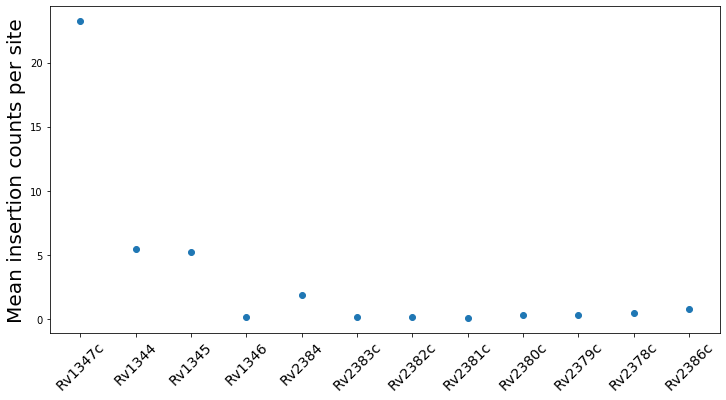

In [77]:
plt.figure(figsize=(12,6))
plt.plot(mean_all, 'o')
lbl = plt.xticks(range(len(mbt2+ mbt1)), labels=mbt2+ mbt1, fontsize = 14, rotation = 45)
plt.ylabel('Mean insertion counts per site', fontsize = 20)